Шамсутдинов Рустам БВТ2201

Лабораторная работа 2 по сиаод: 

Создать аналог акинатора, определяющий преподавателей и что нас ждёт с ним на сессии

Задаём точки на плоскости методом заполнения квадратичного дерева. С помощью генератора случайных чисел распределяем местоположение точек на плоскости. У каждого объекта свой уникальный номер. Глубина, точность этого дерева, количество объектов - задаётся нами. Нужно визуализировать на координатной плоскости местонахождение этих точек. Далее вбиваем id объекта и выводим всех ближайших соседей.

In [1]:
import random
import matplotlib.pyplot as plt

# Класс для представления точки на плоскости
class Point:
    def __init__(self, x, y, id):
        self.x = x
        self.y = y
        self.id = id

# Класс квадрата, который будет использоваться для деления области
class Rectangle:
    def __init__(self, x, y, width, height):
        self.x = x
        self.y = y
        self.width = width
        self.height = height

    # Проверяет, содержит ли прямоугольник данную точку
    def contains(self, point):
        return (self.x <= point.x < self.x + self.width and
                self.y <= point.y < self.y + self.height)

    # Проверяет, пересекается ли данный прямоугольник с другим
    def intersects(self, range):
        return not (range.x > self.x + self.width or
                    range.x + range.width < self.x or
                    range.y > self.y + self.height or
                    range.y + range.height < self.y)

# Класс квадратичного дерева
class Quadtree:
    def __init__(self, boundary, capacity):
        self.boundary = boundary  # Прямоугольник, представляющий область
        self.capacity = capacity  # Максимальное количество точек до разделения
        self.points = []          # Список точек в текущем узле
        self.divided = False      # Флаг, указывающий, разделен ли узел

    # Делит узел на 4 подузла
    def subdivide(self):
        x = self.boundary.x
        y = self.boundary.y
        w = self.boundary.width / 2
        h = self.boundary.height / 2

        self.northwest = Quadtree(Rectangle(x, y, w, h), self.capacity)
        self.northeast = Quadtree(Rectangle(x + w, y, w, h), self.capacity)
        self.southwest = Quadtree(Rectangle(x, y + h, w, h), self.capacity)
        self.southeast = Quadtree(Rectangle(x + w, y + h, w, h), self.capacity)

        self.divided = True

    # Добавляет точку в квадратичное дерево
    def insert(self, point):
        if not self.boundary.contains(point):
            return False

        if len(self.points) < self.capacity:
            self.points.append(point)
            return True
        else:
            if not self.divided:
                self.subdivide()

            if self.northwest.insert(point):
                return True
            elif self.northeast.insert(point):
                return True
            elif self.southwest.insert(point):
                return True
            elif self.southeast.insert(point):
                return True

    # Находит все точки в пределах заданного прямоугольника
    def query(self, range, found):
        if not self.boundary.intersects(range):
            return
        else:
            for p in self.points:
                if range.contains(p):
                    found.append(p)
            if self.divided:
                self.northwest.query(range, found)
                self.northeast.query(range, found)
                self.southwest.query(range, found)
                self.southeast.query(range, found)

# Вспомогательная функция для поиска ближайших соседей
def find_neighbors(tree, point, radius):
    search_area = Rectangle(point.x - radius, point.y - radius, radius * 2, radius * 2)
    neighbors = []
    tree.query(search_area, neighbors)

    if point in neighbors:
        neighbors.remove(point)

    
    return neighbors


In [2]:
# Генерация случайных точек на плоскости
def generate_random_points(num_points, width, height):
    points = []
    for i in range(num_points):
        x = random.uniform(0, width)
        y = random.uniform(0, height)
        points.append(Point(x, y, i))
    return points


In [3]:
# Визуализация границ квадратичного дерева
def draw_quadtree_boundaries(quadtree):
    if quadtree is None:
        return

    # Рисуем границу текущего узла (прямоугольник)
    rect = plt.Rectangle(
        (quadtree.boundary.x, quadtree.boundary.y),
        quadtree.boundary.width,
        quadtree.boundary.height,
        fill=False,
        edgecolor='blue',
        linestyle='--'
    )
    plt.gca().add_patch(rect)

    # Если узел разделен, рисуем границы для всех дочерних узлов
    if quadtree.divided:
        draw_quadtree_boundaries(quadtree.northwest)
        draw_quadtree_boundaries(quadtree.northeast)
        draw_quadtree_boundaries(quadtree.southwest)
        draw_quadtree_boundaries(quadtree.southeast)

# Визуализация точек на плоскости
def visualize(points, quadtree=None, highlight=None, radius=0):
    plt.figure(figsize=(8, 8))
    plt.xlim(0, 100)
    plt.ylim(0, 100)
    
    # Отображаем все точки
    for point in points:
        plt.scatter(point.x, point.y, s=10, c='blue')
        # Добавляем лейбл для каждой точки
        plt.text(point.x + 0.5, point.y + 0.5, f'{point.id}', fontsize=8)

    # Подсвечиваем выделенную точку и её соседей
    if highlight:

        # Отрисовка области поиска
        search_area = Rectangle(highlight.x - radius, highlight.y - radius, radius * 2, radius * 2)
        search_rect = plt.Rectangle(
            (search_area.x, search_area.y), search_area.width, search_area.height,
            fill=False, edgecolor='orange', linestyle='-', linewidth=2,
        )
        plt.gca().add_patch(search_rect)
        
        neighbors = find_neighbors(quadtree, highlight, radius)
        for neighbor in neighbors:
            
            plt.scatter(neighbor.x, neighbor.y, s=10, c='orange')
            plt.text(neighbor.x + 0.5, neighbor.y + 0.5, f'{neighbor.id}', fontsize=8, color='orange')

        plt.scatter(highlight.x, highlight.y, s=10, c='red')
        plt.text(highlight.x + 0.5, highlight.y + 0.5, f'{highlight.id}', fontsize=8, color='red')

    # Отображаем границы квадратичного дерева
    if quadtree:
        draw_quadtree_boundaries(quadtree)

    plt.show()



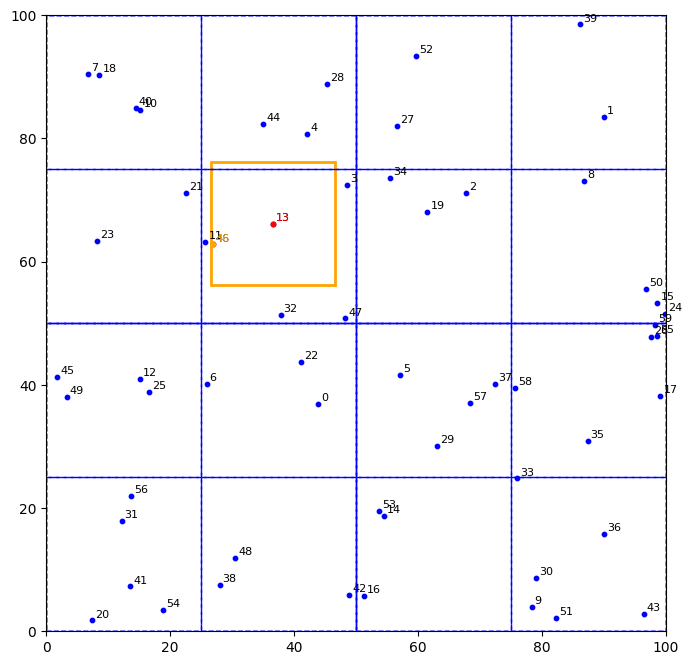

In [4]:
if __name__ == "__main__":
    # Задаем параметры
    width = 100
    height = 100
    num_points = 60
    capacity = 5 # Максимум точек на узел до разделения
    radius = 10 # Радиус поиска точек

    # Создаем границу для дерева
    boundary = Rectangle(0, 0, width, height)

    # Создаем квадратичное дерево
    quadtree = Quadtree(boundary, capacity)

    # Генерируем точки
    points = generate_random_points(num_points, width, height)

    # Вставляем точки в дерево
    for point in points:
        quadtree.insert(point)

    # Выбираем случайную точку для поиска соседей
    selected_point = random.choice(points)

    # Визуализируем точки и выделяем соседей
    visualize(points, quadtree, highlight=selected_point, radius=radius)


Аналог Акинатора

In [5]:
class Teacher:
    def __init__(self, name, gender, faculty, department, years_experience, associate_professor, assistant, department_head, head_campus, module):
        self.name = name
        self.gender = gender
        self.faculty = faculty
        self.department = department
        self.years_experience = years_experience
        self.associate_professor = associate_professor
        self.assistant = assistant
        self.department_head = department_head
        self.head_campus = head_campus
        self.module = module

    def to_dict(self):
        return {
            "name": self.name,
            "gender": self.gender,
            "faculty": self.faculty,
            "department": self.department,
            "years_experience": self.years_experience,
            "associate_professor": self.associate_professor,
            "assistant": self.assistant,
            "department_head": self.department_head,
            "head_campus": self.head_campus,
            "module": self.module
        }

    @staticmethod
    def from_dict(data):
        return Teacher(
            name=data["name"],
            gender=data["gender"],
            faculty=data["faculty"],
            department=data["department"],
            years_experience=data["years_experience"],
            associate_professor=data["associate_professor"],
            assistant=data["assistant"],
            department_head=data["department_head"],
            head_campus=data["head_campus"],
            module=data["module"]
        )

In [6]:
import json


DATA_FILE = "teachers.json"

def load_teachers():
    with open(DATA_FILE, "r", encoding="utf-8") as f:
        data = json.load(f)
        return [Teacher.from_dict(entry) for entry in data["teachers"]]


def save_teachers(teachers):
    with open(DATA_FILE, "w", encoding="utf-8") as f:
        json.dump({"teachers": [teacher.to_dict() for teacher in teachers]}, f, ensure_ascii=False, indent=4)


questions = [
    ("Is the teacher male or female?", "gender", ["Male", "Female"]),
    ("Which faculty does the teacher belong to?", "faculty", [
        "Information Technology",
        "Cybernetics and Information Security"
    ]),
    ("Which department does the teacher belong to?", "department", [
        "Mathematical Cybernetics and IT",
        "Corporate Information Systems",
        "Mathematical Analysis",
        "Probability and Applied Mathematics",
        "Physical Education"
    ]),
    ("Does the teacher have more than 10 years of experience?", "years_experience", 10),
    ("Is the teacher an Associate Professor?", "associate_professor", True),
    ("Is the teacher an Assistant?", "assistant", True),
    ("Is the teacher the head of the department?", "department_head", True),
    ("Which campus is the teacher located at?", "head_campus", ["Narodnoe Opolchenie", "Aviamatornaya", "Both"]),
    ("Which module does the teacher teach?", "module", [
        "Information Technology and Programming",
        "Structure and Algorithms for Data Processing",
        "Practical Project",
        "Discrete Mathematics",
        "Higher Mathematics",
        "Mathematical Methods in Big Data",
        "Probability and Statistics",
        "Sport",
        "Databases"
    ])
]

def ask_question(question):
    print(question[0])
    if isinstance(question[2], list):
        for i, option in enumerate(question[2]):
            print(f"{i + 1}. {option}")
        while True:
            try:
                answer = int(input("Enter the number corresponding to your answer: "))
                if 1 <= answer <= len(question[2]):
                    return question[2][answer - 1]
            except ValueError:
                print("Invalid input. Please enter a valid number.")
    else:
        while True:
            answer = input("Enter 'Yes' or 'No': ").lower()
            if answer in ["yes", "no"]:
                return answer == "yes"



In [7]:
def add_teacher(user_answers):
    name = input("Enter the teacher's name: ")
    years_experience = int(input("Enter the teacher's years of experience: "))

    new_teacher = Teacher(
        name=name,
        gender=user_answers.get("gender", "Unknown"),
        faculty=user_answers.get("faculty", "Unknown"),
        department=user_answers.get("department", "Unknown"),
        years_experience=years_experience,
        associate_professor=user_answers.get("associate_professor", False),
        assistant=user_answers.get("assistant", False),
        department_head=user_answers.get("department_head", False),
        head_campus=user_answers.get("head_campus", "Unknown"),
        module=user_answers.get("module", "None")
    )

    teachers = load_teachers()
    teachers.append(new_teacher)
    save_teachers(teachers)
    print(f"Teacher '{name}' added to the database!")


def play_game():
    teachers = load_teachers()
    possible_teachers = teachers[:]
    user_answers = {}

    for question in questions:
        answer = ask_question(question)
        attribute = question[1]
        user_answers[attribute] = answer

        if isinstance(question[2], int):  
            if answer:
                possible_teachers = [t for t in possible_teachers if getattr(t, attribute) >= question[2]]
            else:
                possible_teachers = [t for t in possible_teachers if getattr(t, attribute) < question[2]]
        else:
            possible_teachers = [t for t in possible_teachers if getattr(t, attribute) == answer]

        if len(possible_teachers) == 0:
            print("No matching teacher found. You can add this teacher.")
            add_teacher(user_answers)
            return

    if len(possible_teachers) == 1:
        print(f"The teacher you're thinking of is: {possible_teachers[0].name}")
    else:
        print("Multiple possible teachers found:")
        for teacher in possible_teachers:
            print(teacher.name)

if __name__ == "__main__":
    play_game()

Is the teacher male or female?
1. Male
2. Female
Which faculty does the teacher belong to?
1. Information Technology
2. Cybernetics and Information Security
Which department does the teacher belong to?
1. Mathematical Cybernetics and IT
2. Corporate Information Systems
3. Mathematical Analysis
4. Probability and Applied Mathematics
5. Physical Education
Does the teacher have more than 10 years of experience?
Is the teacher an Associate Professor?
Is the teacher an Assistant?
Is the teacher the head of the department?
Which campus is the teacher located at?
1. Narodnoe Opolchenie
2. Aviamatornaya
3. Both
Which module does the teacher teach?
1. Information Technology and Programming
2. Structure and Algorithms for Data Processing
3. Practical Project
4. Discrete Mathematics
5. Higher Mathematics
6. Mathematical Methods in Big Data
7. Probability and Statistics
8. Sport
9. Databases
The teacher you're thinking of is: Alice Johnson
